
##Time Series Challenge
####I used GDP data from 1990-2020. This data is available on the FRED's website.
#### Go about the process of time series modeling. Specifically, generate the following deliverables:
####I will plot the time series (along with any logical or necessary differences to get a stationary dataset)
####Generate and interpret a PACF for the time series (and/or its differences)
####Generate 5 ARIMA specifications and evaluate their efficacy at modeling the data
####Choose one specification and make the case for that as a logical model for the dataset

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the dataset
gdp_df = pd.read_csv('/content/drive/My Drive/GDP.csv')

In [ ]:
gdp_df.head()

,DATE,GDP
0,1/1/1990,5872.701
1,4/1/1990,5960.028
2,7/1/1990,6015.116
3,10/1/1990,6004.733
4,1/1/1991,6035.178


In [ ]:
gdp_df.dtypes

DATE     object
GDP     float64
dtype: object

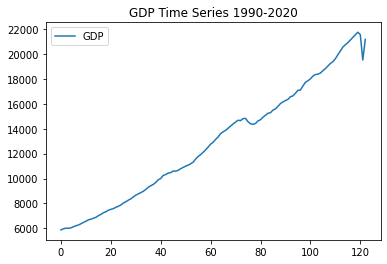

In [ ]:
#plot the series
gdp_df.plot()
plt.title('GDP Time Series 1990-2020')
plt.show()

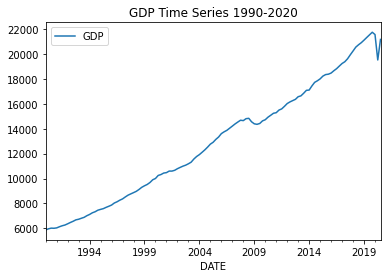

In [ ]:
#fix x axis to be more easily interpretable
gdp_df.index = pd.to_datetime(gdp_df.DATE)
gdp_df.plot()
plt.title('GDP Time Series 1990-2020')
plt.show()

####There is certainly a trend to this series. I will need to apply differencing to make the series stationary so that I can fit ARIMA models.

####Stationarize the dataset

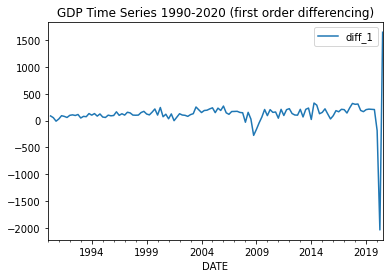

In [ ]:
gdp_df['diff_1'] = gdp_df.GDP - gdp_df.GDP.shift()
gdp_df.plot(y='diff_1')
plt.title('GDP Time Series 1990-2020 (first order differencing)')
plt.show()

####The first order differencing seems to have mostly removed the trend. This should now meet the required assumptions of the ARIMA models. Now, I will generated the PACF and the first order differences.

Text(0.5, 1.0, 'GDP')

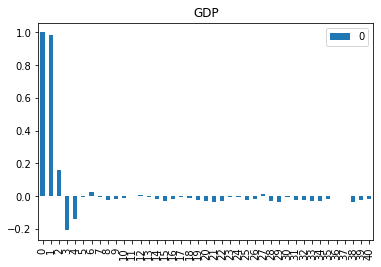

In [ ]:
x_acf = pd.DataFrame(pacf(gdp_df.GDP))
x_acf.plot(kind='bar')
plt.title("GDP")

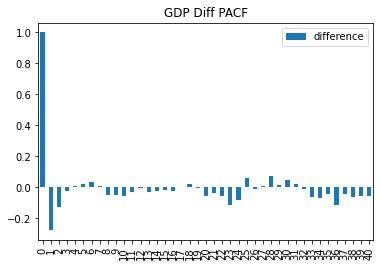

In [ ]:
x_acf = pd.DataFrame(pacf(gdp_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("GDP Diff PACF")
plt.legend(['difference'])

####For example, in the AR plot, it's clear that 2 is a strong autocorrelation. And in the MA plot, 0 seems to be strong. This indicates that you should look into  𝑝  values of 2 and 0, respectively, for your models.

####I will first build an ARIMA model with p set to 2 and I set to 0. I will then try models with different p, i, and q values to compare them.

In [ ]:
model = ARIMA(gdp_df.GDP, order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                    GDP   No. Observations:                  123
Model:                     ARMA(2, 0)   Log Likelihood                -879.087
Method:                       css-mle   S.D. of innovations            283.595
Date:                Sat, 26 Dec 2020   AIC                           1766.174
Time:                        16:59:00   BIC                           1777.422
Sample:                    01-01-1990   HQIC                          1770.743
                         - 07-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.291e+04        nan        nan        nan         nan         nan
ar.L1.GDP      0.9344   6.87e-06   1.36e+05      0.000       0.934       0.934
ar.L2.GDP      0.0656   7.35e-07   8.92e+04      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


####Model 1 has an AIC of 1766.174 and a log likelihood of -879.087. This is decent and these estimates are certainly better than the ones generated in the previous checkpoint. The log likelihood indicates the log of the likelihood that Model 1 would generate this data. The closer to zero, the higher the probablity we are to have predicted our outcome with our given model. A log-likelihood of -879 certainly is not very close to zero, but it could be worse. I will have to compare this AIC estimate to the other models below to see which is best.

####Model 2

In [ ]:
model = ARIMA(gdp_df.GDP, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                    GDP   No. Observations:                  123
Model:                     ARMA(2, 2)   Log Likelihood                -857.572
Method:                       css-mle   S.D. of innovations            247.023
Date:                Sat, 26 Dec 2020   AIC                           1727.144
Time:                        17:01:34   BIC                           1744.017
Sample:                    01-01-1990   HQIC                          1733.998
                         - 07-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.09e+04        nan        nan        nan         nan         nan
ar.L1.GDP      1.8906      0.000   1.74e+04      0.000       1.890       1.891
ar.L2.GDP     -0.8906      0.000  -8127.415      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


####Model 2 (order = 2,0,2) has slightly better AIC (1727.144) and log-likelihood (-857.572) estimates in comparison to Model 1.

####Model 3

In [ ]:
model = ARIMA(gdp_df.GDP, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                  122
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -840.691
Method:                       css-mle   S.D. of innovations            231.019
Date:                Sat, 26 Dec 2020   AIC                           1693.381
Time:                        17:03:53   BIC                           1710.206
Sample:                    04-01-1990   HQIC                          1700.215
                         - 07-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         119.2088     19.500      6.113      0.000      80.989     157.429
ar.L1.D.GDP    -0.5531      0.098     -5.641      0.000      -0.745      -0.361
ar.L2.D.GDP    -0.7585      0.140     -5.415    

####Model 3 (order = 2,1,2) has slightly better AIC (1693.381) and log-likelihood (-840.691) estimates in comparison to Model 2.

####Model 4

In [ ]:
model = ARIMA(gdp_df.GDP, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  121
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -838.621
Method:                       css-mle   S.D. of innovations            239.806
Date:                Sat, 26 Dec 2020   AIC                           1689.242
Time:                        17:05:29   BIC                           1706.016
Sample:                    07-01-1990   HQIC                          1696.054
                         - 07-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3412      0.453      0.754      0.453      -0.546       1.229
ar.L1.D2.GDP    -1.3392      0.104    -12.908      0.000      -1.543      -1.136
ar.L2.D2.GDP    -0.4103      0.112     -3.67

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


####Model 4 (order = 2,2,2) has slightly better AIC (1689.242) and log-likelihood (-838.621) estimates in comparison to Model 3.

####Model 5

In [ ]:
model = ARIMA(gdp_df.GDP, order=(0,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  121
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -841.792
Method:                       css-mle   S.D. of innovations            252.172
Date:                Sat, 26 Dec 2020   AIC                           1691.583
Time:                        17:07:15   BIC                           1702.767
Sample:                    07-01-1990   HQIC                          1696.125
                         - 07-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.6141      5.988     -0.437      0.663     -14.350       9.122
ma.L1.D2.GDP    -1.2938      0.084    -15.450      0.000      -1.458      -1.130
ma.L2.D2.GDP     0.5443      0.154      3.54

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


####Model 5 (order = 0,2,2) has slightly lower AIC (1691.583) and log-likelihood (-841.792) estimates in comparison to Model 3. So best is Model 4.

####Model 4 appears to be the most efficient at modeling this data. I want to compare the AIC estimates to make sure that this is the best decision.

####Exploring Model 4

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

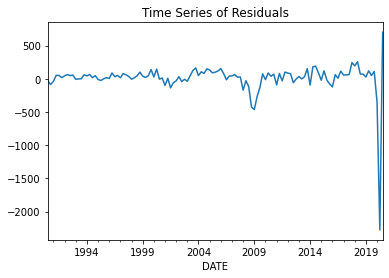

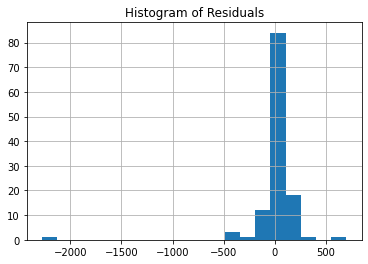

In [ ]:
model = ARIMA(gdp_df.GDP, order=(2,2,2))
model_fit = model.fit()

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

####There does not seem to be any clear trend based on the plot of the residuals, though there is some volatility. The histogram indicates that the residuals are close enough to the standard normal.

####Model 4 Interpretation

In [ ]:
model = ARIMA(gdp_df.GDP, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  121
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -838.621
Method:                       css-mle   S.D. of innovations            239.806
Date:                Sat, 26 Dec 2020   AIC                           1689.242
Time:                        17:12:30   BIC                           1706.016
Sample:                    07-01-1990   HQIC                          1696.054
                         - 07-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3412      0.453      0.754      0.453      -0.546       1.229
ar.L1.D2.GDP    -1.3392      0.104    -12.908      0.000      -1.543      -1.136
ar.L2.D2.GDP    -0.4103      0.112     -3.67

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


####The constant in Model 4 is 0.3410. Then, each day is not quite close to the previous day's value (as indicated by the AR1 coefficient being -1.33 and AR2 coefficient of -0.41).